**Project Name:** Credit Scoring Prediction Model

**Project Goal:** Classify borrowers as high-risk or low-risk for loan approval and predict the likelihood of loan default

**Data Source:** [Kaggle](https://https://www.kaggle.com/datasets/laotse/credit-risk-dataset)

In [1]:
# @title Import libraries

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [2]:
# @title File Management

# Check present working directory
%pwd

'/content'

In [3]:
# Change the directory to drive
%cd /content/drive/MyDrive/PAU

/content/drive/MyDrive/PAU


In [4]:
# Unzip the dataset that was downloaded from kaggle
# !unzip archive\ \(1\).zip

In [5]:
# Read csv file
df = pd.read_csv('credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [6]:
print(f'The dataset shape:', df.shape)

The dataset shape: (32581, 12)


<ipython-input-7-6fd32ce3b668>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='person_age', y='loan_intent', inner='box', palette='Dark2')


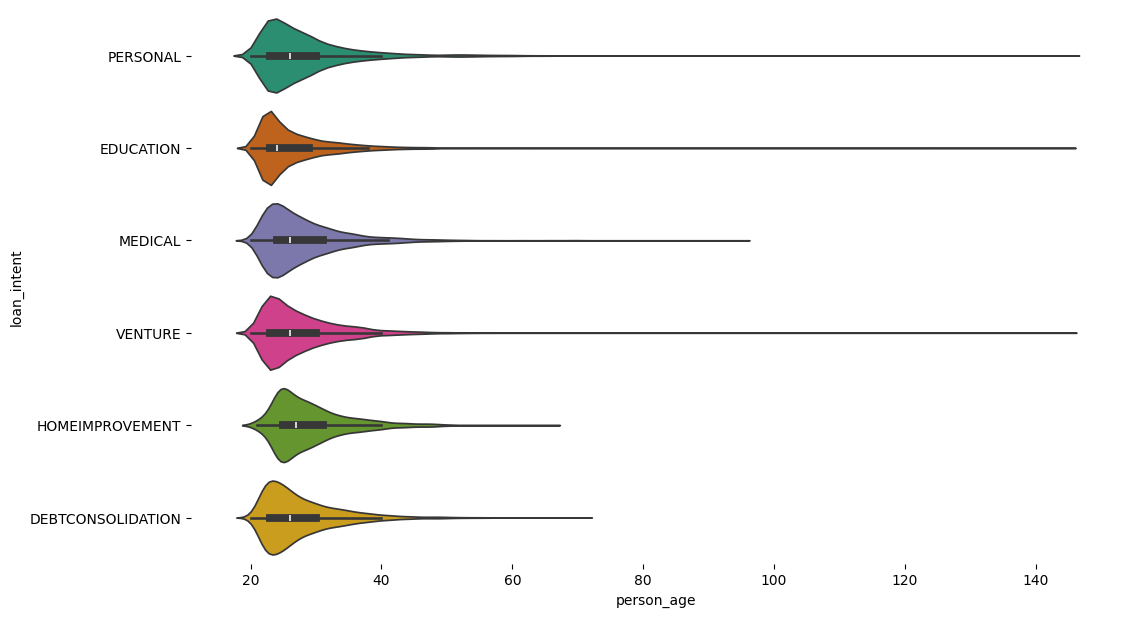

In [7]:
# @title Data Visualisation

# loan_intent vs person_age

figsize = (12, 1.2 * len(df['loan_intent'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='person_age', y='loan_intent', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

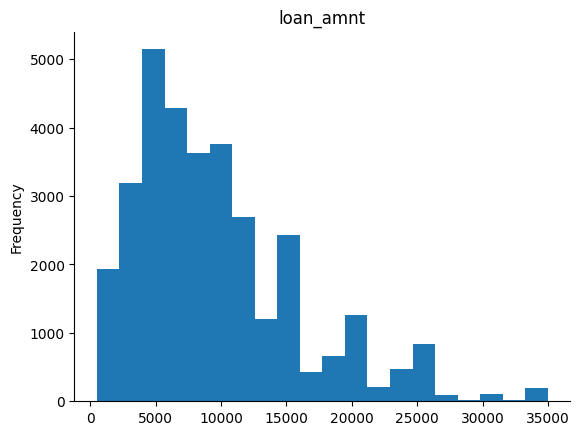

In [8]:
df['loan_amnt'].plot(kind='hist', bins=20, title='loan_amnt')
plt.gca().spines[['top', 'right',]].set_visible(False)

This reveals outliers in the age. Based on this insight, outliers will be handled.

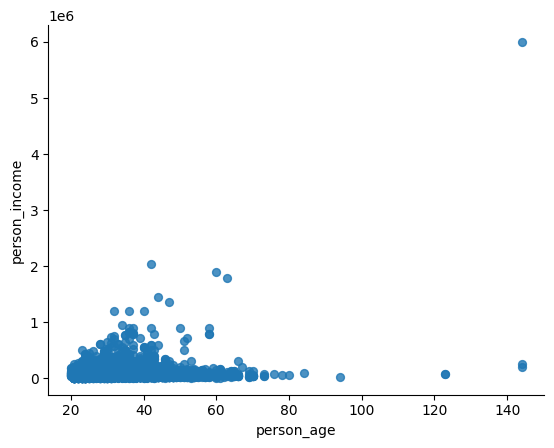

In [9]:
# person_age vs person_income

df.plot(kind='scatter', x='person_age', y='person_income', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [10]:
# @title Data Cleaning and Pre-processing

# fix the outliers in the person_age column. Set 100 as the max age
df.loc[df['person_age'] > 100, 'person_age'] = 100

In [11]:
# Check for null values
df.isna().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


This shows that two features have missing values: `person_emp_length` and `loan_int_rate`. A further analysis into their mean and median values, will provide insight on how to handle these null values.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [13]:
df[["person_emp_length", "loan_int_rate"]].describe()

,person_emp_length,loan_int_rate
count,31686.000000,29465.000000
mean,4.789686,11.011695
std,4.142630,3.240459
min,0.000000,5.420000
25%,2.000000,7.900000
50%,4.000000,10.990000
75%,7.000000,13.470000
max,123.000000,23.220000


Since the difference between the mean and median for each feature is small, we can fill the missing values using the mean.

In [14]:
# Handle missing values in both features.

df['person_emp_length'].fillna(df['person_emp_length'].mean(), inplace=True)
df['loan_int_rate'].fillna(df['loan_int_rate'].mean(), inplace=True)

<ipython-input-14-050ef171eb40>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['person_emp_length'].fillna(df['person_emp_length'].mean(), inplace=True)
<ipython-input-14-050ef171eb40>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

The statistical information on `person_emp_length` also shows that there are people with 0 employment length, signifying unemployment.

To further analyse this demography, we investigate the loan intent to identify the type of loans these customers are interested in.

In addition, we also look at their income distribution.

number of unemployed customers:  4105


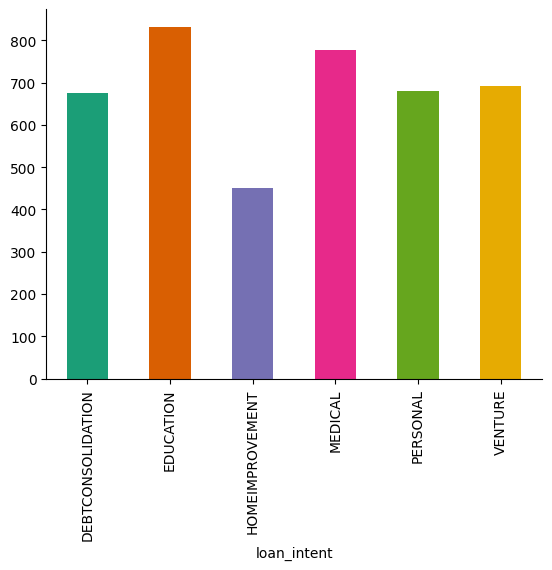

In [15]:
# loan_intent vs person_emp_length

unemployed = df[df["person_emp_length"]==0]
print("number of unemployed customers: ", len(unemployed))

unemployed.groupby('loan_intent').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

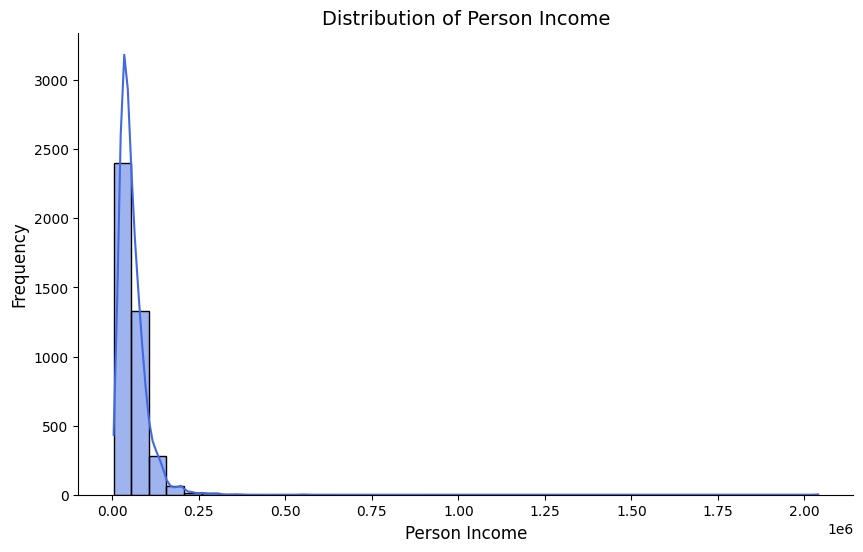

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(unemployed['person_income'], bins=40, kde=True, color='royalblue')
plt.title('Distribution of Person Income', fontsize=14)
plt.xlabel('Person Income', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


This shows that unemployment does not equate no income in this data. However, their income group is low.

In [17]:
# @title Data Transformation

# label encode the categorical columns
categorical_cols_to_encode = ['person_home_ownership', 'loan_intent', 'loan_grade', 'loan_status', 'cb_person_default_on_file']
label_mappings = {}  # Dictionary to store mappings

for col in categorical_cols_to_encode:
    le = LabelEncoder()  # Create a new instance for each column
    df[col] = le.fit_transform(df[col])
    label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))  # Store mappings

# Print the correct mappings
for col, mapping in label_mappings.items():
    print(f"Encoding for '{col}': {mapping}\n")


Encoding for 'person_home_ownership': {'MORTGAGE': 0, 'OTHER': 1, 'OWN': 2, 'RENT': 3}

Encoding for 'loan_intent': {'DEBTCONSOLIDATION': 0, 'EDUCATION': 1, 'HOMEIMPROVEMENT': 2, 'MEDICAL': 3, 'PERSONAL': 4, 'VENTURE': 5}

Encoding for 'loan_grade': {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}

Encoding for 'loan_status': {0: 0, 1: 1}

Encoding for 'cb_person_default_on_file': {'N': 0, 'Y': 1}



In [18]:
# @title Check for Multicolinearity

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
person_age,1.000000,0.153617,-0.032820,0.162916,0.035608,0.014192,0.051493,0.011693,-0.021443,-0.042197,0.006284,0.869459
person_income,0.153617,1.000000,-0.203177,0.133360,0.001527,-0.001022,0.266820,0.000752,-0.144449,-0.254471,-0.003613,0.117987
person_home_ownership,-0.032820,-0.203177,1.000000,-0.228856,0.011004,0.120438,-0.130776,0.133496,0.211600,0.142129,0.063004,-0.025534
person_emp_length,0.162916,0.133360,-0.228856,1.000000,0.021444,-0.046693,0.111768,-0.052839,-0.080977,-0.053120,-0.027425,0.142904
loan_intent,0.035608,0.001527,0.011004,0.021444,1.000000,-0.008042,-0.004597,-0.001290,-0.065575,0.000986,-0.003950,0.035251
loan_grade,0.014192,-0.001022,0.120438,-0.046693,-0.008042,1.000000,0.145799,0.889922,0.373080,0.123021,0.537054,0.015069
loan_amnt,0.051493,0.266820,-0.130776,0.111768,-0.004597,0.145799,1.000000,0.139488,0.105376,0.572612,0.039081,0.041967
loan_int_rate,0.011693,0.000752,0.133496,-0.052839,-0.001290,0.889922,0.139488,1.000000,0.319342,0.114520,0.477137,0.015788
loan_status,-0.021443,-0.144449,0.211600,-0.080977,-0.065575,0.373080,0.105376,0.319342,1.000000,0.379366,0.179141,-0.015529
loan_percent_income,-0.042197,-0.254471,0.142129,-0.053120,0.000986,0.123021,0.572612,0.114520,0.379366,1.000000,0.035910,-0.031690


Based on the correlation plot above, some features that are highly correlated with other features are taken out. For example, the plot shows that `loan_int_rate` and `loan_grade`, have a very strong relationship.

The below columns are the features to be removed.

- loan_int_rate
- person_age
- loan_percent_income
- loan_grade

In [19]:
df_copy = df.copy()

In [20]:
# drop features
features_to_drop = ["loan_int_rate", "person_age", "loan_percent_income", "loan_grade"]
df_copy = df_copy.drop(columns=features_to_drop)

corr = df_copy.corr()
corr.style.background_gradient(cmap='coolwarm')

,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_status,cb_person_default_on_file,cb_person_cred_hist_length
person_income,1.000000,-0.203177,0.133360,0.001527,0.266820,-0.144449,-0.003613,0.117987
person_home_ownership,-0.203177,1.000000,-0.228856,0.011004,-0.130776,0.211600,0.063004,-0.025534
person_emp_length,0.133360,-0.228856,1.000000,0.021444,0.111768,-0.080977,-0.027425,0.142904
loan_intent,0.001527,0.011004,0.021444,1.000000,-0.004597,-0.065575,-0.003950,0.035251
loan_amnt,0.266820,-0.130776,0.111768,-0.004597,1.000000,0.105376,0.039081,0.041967
loan_status,-0.144449,0.211600,-0.080977,-0.065575,0.105376,1.000000,0.179141,-0.015529
cb_person_default_on_file,-0.003613,0.063004,-0.027425,-0.003950,0.039081,0.179141,1.000000,0.004564
cb_person_cred_hist_length,0.117987,-0.025534,0.142904,0.035251,0.041967,-0.015529,0.004564,1.000000


In [21]:
# data normalization for numerical columns
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

numerical_cols_to_normalize = ['person_income', 'person_emp_length', 'loan_amnt', 'cb_person_cred_hist_length']

df[numerical_cols_to_normalize] = scaler.fit_transform(df[numerical_cols_to_normalize])

df.head(2)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,0.009173,3,1.00000,4,3,1.000000,16.02,1,0.59,1,0.035714
1,21,0.000934,2,0.04065,1,1,0.014493,11.14,0,0.10,0,0.000000


In [22]:
# @title Model Development

df_copy['loan_status'].value_counts()

,count
loan_status,
0,25473
1,7108


Due to the visibily skewed label, the data will be downsampled to create a balanced dataset for training.

In [23]:
# reduce class 0.

class1_length = df_copy[df_copy['loan_status'] == 1].shape[0]
print(class1_length)

# shuffle the data and reduce class 0 to match class 1
df_copy = df_copy.sample(frac=1, random_state=1)

df_copy = df_copy.reset_index(drop=True)

df_copy_class0 = df_copy[df_copy['loan_status'] == 0].iloc[:class1_length, :] # reduce this
df_copy_class1 = df_copy[df_copy['loan_status'] == 1]

# merge and shuffle again
df_copy = pd.concat([df_copy_class0, df_copy_class1])
df_copy = df_copy.sample(frac=1, random_state=1)
df_copy = df_copy.reset_index(drop=True)

df_copy['loan_status'].value_counts()

7108


,count
loan_status,
1,7108
0,7108


In [24]:
df_copy.tail()

,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_status,cb_person_default_on_file,cb_person_cred_hist_length
14211,27048,3,5.0,0,3500,0,0,7
14212,36000,3,3.0,1,7000,0,0,3
14213,84000,3,1.0,5,8000,1,0,2
14214,67000,2,12.0,2,20000,0,0,7
14215,42000,3,2.0,4,10800,1,0,2


In [25]:
X = df_copy.drop(columns=['loan_status']) # all features excluding loan_status label
y = df_copy['loan_status'] # the label column

In [26]:
# split the data into test and train using 80:20

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [27]:
# train a simple model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [28]:
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.62      0.66      1423
           1       0.66      0.74      0.70      1421

    accuracy                           0.68      2844
   macro avg       0.68      0.68      0.68      2844
weighted avg       0.68      0.68      0.68      2844



In [29]:
# use a more complex model like RandomForest

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78      1423
           1       0.80      0.73      0.76      1421

    accuracy                           0.77      2844
   macro avg       0.77      0.77      0.77      2844
weighted avg       0.77      0.77      0.77      2844



In [30]:
# use XGBOOST

from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1423
           1       0.83      0.76      0.80      1421

    accuracy                           0.80      2844
   macro avg       0.80      0.80      0.80      2844
weighted avg       0.80      0.80      0.80      2844



In [31]:
# apply hyperparameter tuning on the xgboost model using grid search
params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300]
}

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(xgb_model, params, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


In [32]:
# apply the best parameters
grid_search_model = XGBClassifier(learning_rate=0.01, max_depth=5, n_estimators=300)
grid_search_model.fit(X_train, y_train)

y_pred = grid_search_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.83      0.78      1423
           1       0.81      0.70      0.75      1421

    accuracy                           0.77      2844
   macro avg       0.77      0.77      0.77      2844
weighted avg       0.77      0.77      0.77      2844



In [33]:
# use ExtraTrees classifer

from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76      1423
           1       0.77      0.72      0.74      1421

    accuracy                           0.75      2844
   macro avg       0.75      0.75      0.75      2844
weighted avg       0.75      0.75      0.75      2844



**Based on the machine learning experiments above, the base XGBClassifier model gave the best model outcome with the following result:**

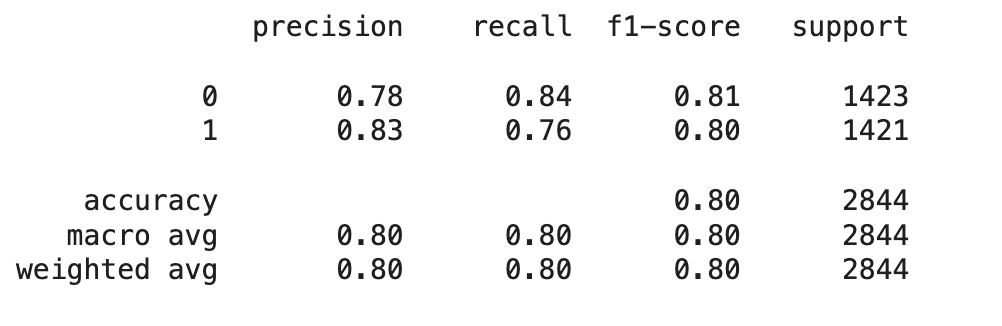

## Model Selection Justification

Of the five classifiers explored — Logistic Regression, Random Forest, XGBoost (with and without Grid Search), and ExtraTrees, the XGBoost model trained without Grid Search performed the best.

This conclusion is based on the recall values for the default class (1).

A model with a high recall for identifying high-risk customers (class 1) ensures that most actual high-risk customers are correctly classified. In this case, the recall for class 1 is 76%, meaning 76% of actual defaulters were correctly identified.

This approach ensures a reliable model for filtering out high-risk customers, which is the primary goal of the project.

At the same time, we aim to minimize the rejection of good customers. This is reflected in the recall value for the low-risk class (0), which is 84%, indicating that 84% of actual non-defaulters were correctly classified.

In [34]:
X_test.columns

Index(['person_income', 'person_home_ownership', 'person_emp_length',
       'loan_intent', 'loan_amnt', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')

In [35]:
# test
final_y_pred = xgb_model.predict(X_test)

result_df = X_test.copy()

result_df['y_test'] = y_test
result_df['y_pred'] = final_y_pred

result_df

,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,cb_person_default_on_file,cb_person_cred_hist_length,y_test,y_pred
9545,42000,2,1.0,5,7500,0,3,0,0
10886,68804,0,1.0,1,22000,0,6,0,1
5499,33000,3,12.0,4,8000,0,9,1,1
8815,350000,0,13.0,0,12000,0,7,0,0
12822,90000,1,5.0,3,16000,0,4,0,0
...,...,...,...,...,...,...,...,...,...
7935,59000,3,2.0,1,6500,0,3,0,1
10417,59004,3,1.0,0,7800,1,3,1,1
7942,15000,3,2.0,5,4000,0,6,1,1
10245,74000,3,0.0,5,12000,1,2,1,1


## Model Interpretation with SHAP

In [36]:
import shap

explainer = shap.Explainer(xgb_model, X_test)

shap_values = explainer(X_test)

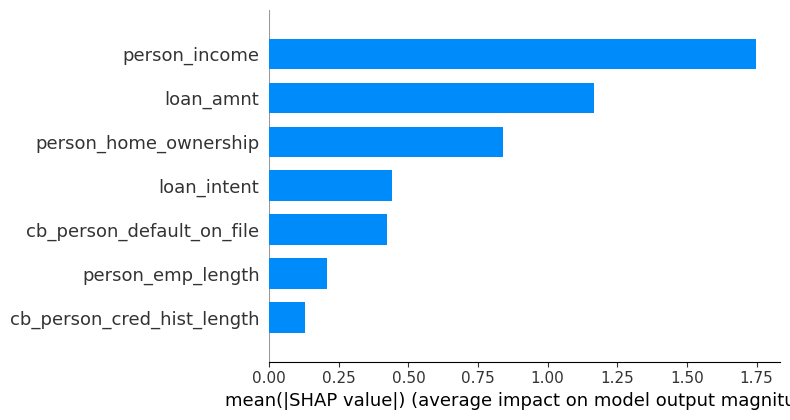

In [37]:
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, plot_type="bar")

The data visualisation above shows the order in which each feature contributes to the model's prediction.

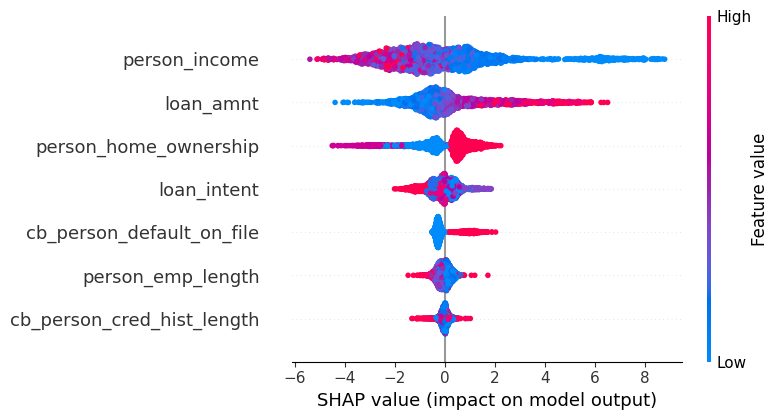

In [38]:
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test)

Encoding for 'person_home_ownership': {'MORTGAGE': 0, 'OTHER': 1, 'OWN': 2, 'RENT': 3}

Encoding for 'loan_intent': {'DEBTCONSOLIDATION': 0, 'EDUCATION': 1, 'HOMEIMPROVEMENT': 2, 'MEDICAL': 3, 'PERSONAL': 4, 'VENTURE': 5}

Encoding for 'loan_grade': {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}

Encoding for 'loan_status': {0: 0, 1: 1}

Encoding for 'cb_person_default_on_file': {'N': 0, 'Y': 1}

The data visualisation above indicates that higher income and loan amount have the most significant impact on the model's predictions, while home ownership, loan intent, and credit history length also influence outcomes but with smaller effects

In [40]:
## save artifacts
import joblib

# scaler
joblib.dump(scaler, 'scaler.pkl')

# xgboost model
joblib.dump(xgb_model, 'xgb_model.pkl')

['xgb_model.pkl']

In [39]:
# @title User Input

# map the encoded labels
home_ownership_map = {'MORTGAGE': 0, 'OTHER': 1, 'OWN': 2, 'RENT': 3}
loan_intent_map = {'DEBTCONSOLIDATION': 0, 'EDUCATION': 1, 'HOMEIMPROVEMENT': 2, 'MEDICAL': 3, 'PERSONAL': 4, 'VENTURE': 5}
default_map = {'N': 0, 'Y': 1}

def get_categorical_input(prompt, options_dict):
    """
    For categorical columns -- to display their different options to guide user's input
    """
    print(f"\n{prompt}")
    for key, value in options_dict.items():
        print(f"{value}: {key}")
    while True:
        try:
            choice = int(input("Select an option number: "))
            if choice in options_dict.values():
                return choice
            else:
                print("Invalid selection. Please enter a valid number.")
        except ValueError:
            print("Invalid input. Please enter a number.")

print("\nEnter the details to predict credit risk:") # ask user to enter prompt

person_income = float(input("Annual Income ($): "))
loan_amnt = float(input("Loan Amount Requested ($): "))
person_emp_length = float(input("Employment Length (years): "))
cb_person_cred_hist_length = float(input("Credit History Length (years): "))

# apply the function to the categorical columns below
person_home_ownership = get_categorical_input("Home Ownership Options:", home_ownership_map)
loan_intent = get_categorical_input("Loan Intent Options:", loan_intent_map)
cb_person_default_on_file = get_categorical_input("Has Default History? (0 for N, 1 for Y):", default_map)

# convert to df
input_data = pd.DataFrame({
    'person_income': [person_income],
    'person_home_ownership': [person_home_ownership],
    'person_emp_length': [person_emp_length],
    'loan_intent': [loan_intent],
    'loan_amnt': [loan_amnt],
    'cb_person_default_on_file': [cb_person_default_on_file],
    'cb_person_cred_hist_length': [cb_person_cred_hist_length]
})

input_data[numerical_cols_to_normalize] = scaler.transform(input_data[numerical_cols_to_normalize]) ## apply min max scaler

credit_risk_prediction = xgb_model.predict_proba(input_data)

probability_of_default = credit_risk_prediction[0][1]

# Define a threshold for classification (e.g., 50%)
threshold = 0.5
risk_classification = "High-Risk" if probability_of_default >= threshold else "Low-Risk"

# Print both probability and classification
print(f"Your likelihood of loan default is: {round(probability_of_default * 100, 2)}%")
print(f"Risk Classification: {risk_classification}")


Enter the details to predict credit risk:


KeyboardInterrupt: Interrupted by user